# **1.  Geli≈ütirme Ortamƒ±nƒ±n Hazƒ±rlanmasƒ± ve CUDA Kontrol√º**

Bu b√∂l√ºmde, derin √∂ƒürenme ve bilgisayarla g√∂rme (computer vision) projelerinde kullanƒ±lacak temel k√ºt√ºphaneler y√ºklenmekte ve **CUDA** desteƒüi kontrol edilmektedir.  
CUDA, GPU kullanarak PyTorch i≈ülemlerinin √ßok daha hƒ±zlƒ± yapƒ±lmasƒ±nƒ± saƒülar.  

---

## **Kodun ƒ∞≈ülevleri**

### **1. K√ºt√ºphanelerin ƒ∞√ße Aktarƒ±lmasƒ± (Imports)**
- **pandas** ve **numpy**: Veri analizi ve sayƒ±sal i≈ülemler i√ßin.
- **matplotlib.pyplot**: G√∂rselle≈ütirme ve grafik √ßizimi.
- **cv2** (**OpenCV**): G√∂r√ºnt√º i≈üleme fonksiyonlarƒ±.
- **torch** ve **torch.utils.data**: Derin √∂ƒürenme modelleri ve veri y√ºkleme i≈ülemleri.
- **torchvision.models**: Hazƒ±r derin √∂ƒürenme modellerine eri≈üim.
- **warnings**: Gereksiz uyarƒ±larƒ±n kapatƒ±lmasƒ±.
- **os**: Dosya ve dizin i≈ülemleri.

---

### **2. CUDA Kontrol√º**
Kodun sonunda, sisteminizde GPU desteƒüi olup olmadƒ±ƒüƒ± kontrol edilir.

- **GPU mevcutsa**:
  - CUDA'nƒ±n kullanƒ±labilirliƒüi, sayƒ±sƒ± ve adƒ± ekrana yazdƒ±rƒ±lƒ±r.

- **GPU yoksa**:
  - ƒ∞≈ülemlerin CPU √ºzerinde yapƒ±lacaƒüƒ± belirtilir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelEncoder
import cv2
import torch
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd

# Kontrol Kƒ±sƒ±mƒ±
if torch.cuda.is_available():
    print("CUDA is available")
    print("Number of GPU devices:", torch.cuda.device_count())
    print("Current device name:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    print("CUDA is not available for profit. CPU will be used.")

CUDA is available
Number of GPU devices: 1
Current device name: Tesla P100-PCIE-16GB


# **2. Veri √ñn ƒ∞≈üleme ve DataLoader Hazƒ±rlƒ±ƒüƒ±**

Bu b√∂l√ºmde, **ara√ß markasƒ± sƒ±nƒ±flandƒ±rma** problemi i√ßin veri seti hazƒ±rlanƒ±r ve modelin eƒüitimi sƒ±rasƒ±nda kullanƒ±lmak √ºzere uygun formatta d√∂n√º≈üt√ºr√ºl√ºr.  
Ayrƒ±ca **data augmentation (veri artƒ±rma)** teknikleri uygulanarak modelin genelleme yeteneƒüi g√º√ßlendirilir.

---

## **1. Veri Setinin ƒ∞ncelenmesi**

ƒ∞lk olarak, eƒüitim verilerinin bulunduƒüu klas√∂rdeki her markaya ait g√∂rsel sayƒ±sƒ± hesaplanƒ±r.  
Bu adƒ±m, **veri daƒüƒ±lƒ±mƒ±nƒ±** anlamak ve olasƒ± **dengesizlikleri** tespit etmek i√ßin √∂nemlidir.

**ƒ∞≈ülemler:**
- `os.listdir()` ile her klas√∂rdeki dosyalar sayƒ±lƒ±r.
- Sonu√ßlar bir `pandas.DataFrame` i√ßine kaydedilir.
- G√∂rseller en √ßoktan en aza doƒüru sƒ±ralanƒ±r.

---

## **2. Veri Yollarƒ±nƒ±n Tanƒ±mlanmasƒ±**

Projenin veri seti, √º√ß alt klas√∂re ayrƒ±lmƒ±≈ütƒ±r:
- **train/** ‚Üí Modelin eƒüitileceƒüi veriler  
- **val/** ‚Üí Modelin doƒürulama a≈üamasƒ±nda kullanƒ±lacak veriler  
- **test/** ‚Üí Modelin hi√ß g√∂rmediƒüi test verileri  

Bu dizinlere kolay eri≈üim i√ßin Python'da yol (`path`) deƒüi≈ükenleri tanƒ±mlanƒ±r.

---

## **3. G√∂r√ºnt√º D√∂n√º≈ü√ºmleri ve Data Augmentation**

Modelin daha iyi genelle≈ütirmesi i√ßin **eƒüitim verilerine √ße≈üitli d√∂n√º≈ü√ºmler uygulanƒ±r**.  
Bu i≈ülemler, √∂zellikle g√∂r√ºnt√ºlerin farklƒ± a√ßƒ±lardan, ƒ±≈üƒ±k ko≈üullarƒ±nda ve √∂l√ßeklerde modellenmesini saƒülar.

### **Eƒüitim D√∂n√º≈ü√ºmleri (`train_transforms`)**
- `Resize(224, 224)` ‚Üí G√∂rsellerin sabit boyuta getirilmesi  
- `RandomHorizontalFlip(p=0.5)` ‚Üí Yatayda rastgele √ßevirme (%50 olasƒ±lƒ±kla)  
- `RandomRotation(30)` ‚Üí Rastgele d√∂nd√ºrme (¬±30¬∞)  
- `ColorJitter` ‚Üí Parlaklƒ±k, kontrast ve doygunluk deƒüi≈üiklikleri  
- `RandomResizedCrop` ‚Üí G√∂rsellerin belirli bir oranda kƒ±rpƒ±lmasƒ±  
- `RandomAffine` ‚Üí Konumlandƒ±rmada k√º√ß√ºk kaydƒ±rmalar  
- `ToTensor()` ‚Üí G√∂rselleri tens√∂r formatƒ±na d√∂n√º≈üt√ºrme  
- `Normalize` ‚Üí G√∂rselleri standart normal daƒüƒ±lƒ±ma uygun ≈üekilde normalize etme

### **Doƒürulama ve Test D√∂n√º≈ü√ºmleri (`val_test_transforms`)**
- Sadece `Resize`, `ToTensor` ve `Normalize` i≈ülemleri yapƒ±lƒ±r.  
  B√∂ylece doƒürulama/test verileri sabit ve tutarlƒ± kalƒ±r.

---

## **4. Dataset ve DataLoader Hazƒ±rlƒ±ƒüƒ±**

PyTorch'un `ImageFolder` yapƒ±sƒ± kullanƒ±larak veri seti okunur:  
- **train_dataset** ‚Üí Eƒüitim verileri  
- **val_dataset** ‚Üí Doƒürulama verileri  
- **test_dataset** ‚Üí Test verileri  

Daha sonra `DataLoader` nesneleri ile veriler **mini-batch**'ler halinde GPU/CPU'ya y√ºklenir.

**DataLoader Parametreleri:**
- `batch_size=16` ‚Üí Her adƒ±mda 16 g√∂rsel i≈ülenir.  
- `shuffle=True` ‚Üí Eƒüitim verilerinde sƒ±ralama her epoch ba≈üƒ±nda karƒ±≈ütƒ±rƒ±lƒ±r.  
- `num_workers=4` ‚Üí √áoklu i≈ü par√ßacƒ±ƒüƒ± ile veri y√ºkleme hƒ±zlandƒ±rƒ±lƒ±r.  
- `pin_memory=True` ‚Üí GPU transferi hƒ±zlandƒ±rƒ±lƒ±r.

In [2]:
dataset_path = "/kaggle/input/car-brand-classification-dataset/Car Brand Classification Dataset/train"

image_counts = {}
for brand in os.listdir(dataset_path):
    brand_path = os.path.join(dataset_path, brand)
    if os.path.isdir(brand_path): 
        image_counts[brand] = len(os.listdir(brand_path))

df = pd.DataFrame(list(image_counts.items()), columns=["Brand", "Image Count"])
print(df.sort_values(by="Image Count", ascending=False))

# Veri yollarƒ±
data_dir = "/kaggle/input/car-brand-classification-dataset/Car Brand Classification Dataset"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

# G√∂r√ºnt√º d√∂n√º≈ü√ºmleri & Data Augmentation
import torchvision.transforms as transforms
import torchvision.datasets as datasets

img_size = 300  # EfficientNetB3 input size
batch_size = 16

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
    transforms.RandomResizedCrop(224, scale=(0.7, 1.0)),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Dataset ve DataLoader
from torch.utils.data import DataLoader

train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(root=test_dir, transform=val_test_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

print(f"üìÇ Training samples: {len(train_dataset)} | Validation samples: {len(val_dataset)} | Test samples: {len(test_dataset)}")

            Brand  Image Count
0          Nissan          349
1            Ford          349
2         Hyundai          349
3   Mercedes-Benz          349
4        Chrysler          349
5             GMC          349
6         Lincoln          349
7            FIAT          349
8    Aston Martin          349
9      Volkswagen          349
10     Land Rover          349
11          Buick          349
12          Honda          349
13          Dodge          349
14        Porsche          349
15            Kia          349
16         Toyota          349
17           Jeep          349
18          Volvo          349
19     Mitsubishi          349
20       Cadillac          349
21      Chevrolet          349
22         Jaguar          349
23        Bentley          349
24            BMW          349
25          Lexus          349
26           Audi          349
27       INFINITI          349
28          Acura          349
29         Subaru          349
30          Mazda          349
31      

# **3. Modelin Eƒüitilmesi: EfficientNet-B3 Tabanlƒ± Derin √ñƒürenme Modeli**

Bu b√∂l√ºmde, ara√ß markalarƒ±nƒ±n sƒ±nƒ±flandƒ±rƒ±lmasƒ± i√ßin **EfficientNet-B3** tabanlƒ± bir derin √∂ƒürenme modeli tasarlanmakta ve eƒüitim s√ºreci i√ßin gerekli yapƒ± ta≈ülarƒ± tanƒ±mlanmaktadƒ±r.

---

## **1. Cihaz (Device) Ayarlarƒ±**
Modelin GPU veya CPU √ºzerinde √ßalƒ±≈ümasƒ± belirlenir:
- Eƒüer CUDA destekli bir **GPU** mevcutsa, model GPU √ºzerinde eƒüitilir.
- Aksi durumda, hesaplamalar **CPU** √ºzerinden yapƒ±lƒ±r.

---

## **2. EfficientNet-B3 Modelinin Kullanƒ±mƒ±**
EfficientNet, y√ºksek performanslƒ± ve optimize edilmi≈ü bir **CNN mimarisi**dir.  
Bu projede **EfficientNet-B3**, `torchvision.models` k√ºt√ºphanesinden **ImageNet √∂n eƒüitimli aƒüƒ±rlƒ±klar (IMAGENET1K_V1)** ile y√ºklenir.

- Modelin **feature extractor** kƒ±smƒ± sabit tutulur.
- Son katman yerine **√∂zel bir sƒ±nƒ±flandƒ±rma bloƒüu** eklenir.

---

## **3. √ñzel Model Mimarisinin Tasarƒ±mƒ±**

`CustomEfficientNet` sƒ±nƒ±fƒ±, EfficientNet'in √ºzerine √∂zelle≈ütirilmi≈ü bir **fully connected (FC)** katman yapƒ±sƒ± ekler.

### **Mimari Detaylar:**
1. **Giri≈ü:** EfficientNet'in "features" katmanƒ±ndan gelen √∂zellik haritalarƒ±.
2. `AdaptiveAvgPool2d(1)` ‚Üí √ñzellik haritasƒ±nƒ± tek boyuta indirger.
3. **Classifier Bloƒüu:**
   - `Flatten` ‚Üí Veriyi vekt√∂rle≈ütirir.
   - `Linear(1536 ‚Üí 512)` ‚Üí ƒ∞lk tam baƒülantƒ±lƒ± katman.
   - `LayerNorm` + `ReLU6` ‚Üí Normalizasyon ve aktivasyon.
   - `Dropout(0.4)` ‚Üí A≈üƒ±rƒ± √∂ƒürenmeyi (overfitting) engeller.
   - `Linear(512 ‚Üí 256)` ‚Üí ƒ∞kinci tam baƒülantƒ±lƒ± katman.
   - `LayerNorm` + `ReLU6`
   - `Dropout(0.3)`
   - `Linear(256 ‚Üí num_classes)` ‚Üí √áƒ±kƒ±≈ü katmanƒ± (sƒ±nƒ±f sayƒ±sƒ± kadar n√∂ron).

**Avantajƒ±:** Daha karma≈üƒ±k ve g√º√ßl√º bir sƒ±nƒ±flandƒ±rƒ±cƒ±, modelin veri setine daha iyi uyum saƒülamasƒ±nƒ± saƒülar.

---

## **4. Kayƒ±p Fonksiyonu ve Optimizasyon**

### **Kayƒ±p Fonksiyonu (Loss Function)**
- `nn.CrossEntropyLoss()` ‚Üí √áok sƒ±nƒ±flƒ± sƒ±nƒ±flandƒ±rma problemleri i√ßin uygundur.

### **Optimizer**
- **AdamW** ‚Üí Adam algoritmasƒ±nƒ±n aƒüƒ±rlƒ±k √ß√ºr√ºmesi (weight decay) ile geli≈ütirilmi≈ü versiyonu.
- √ñƒürenme oranƒ±: `lr=5e-5`
- Weight decay: `1e-3` (regularization)

### **√ñƒürenme Oranƒ± Zamanlayƒ±cƒ±sƒ± (Scheduler)**
- `ReduceLROnPlateau`:
  - **Doƒürulama doƒüruluƒüu** (validation accuracy) belirli bir s√ºre iyile≈ümezse √∂ƒürenme oranƒ±nƒ± yarƒ±ya d√º≈ü√ºr√ºr.
  - `factor=0.5`, `patience=2`

---

## **5. Mixed Precision Training (AMP)**

Hafƒ±za ve hƒ±z optimizasyonu i√ßin **Automatic Mixed Precision (AMP)** kullanƒ±lƒ±r:
- `autocast` ‚Üí Hesaplamalarƒ± otomatik olarak **16-bit (half precision)** ve **32-bit (full precision)** arasƒ±nda dengeler.
- `GradScaler` ‚Üí Aƒüƒ±rlƒ±klarƒ±n doƒüru ≈üekilde g√ºncellenmesini saƒülar.

**Avantajlarƒ±:**
- Daha d√º≈ü√ºk GPU bellek kullanƒ±mƒ±
- Daha hƒ±zlƒ± eƒüitim s√ºresi


In [3]:
import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_b3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"üöÄ Using device: {device}")

# EfficientNet tabanlƒ± model
num_classes = len(train_dataset.classes)
base_model = efficientnet_b3(weights="IMAGENET1K_V1")

class CustomEfficientNet(nn.Module):
    def __init__(self, base_model, num_classes):
        super(CustomEfficientNet, self).__init__()
        self.features = base_model.features
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1536, 512),
            nn.LayerNorm(512),
            nn.ReLU6(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.LayerNorm(256),
            nn.ReLU6(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

model = CustomEfficientNet(base_model, num_classes).to(device)
print("‚úÖ EfficientNet-B3 Model Modified Successfully!")

# Kayƒ±p fonksiyonu, optimizer ve scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)

from torch.cuda.amp import autocast, GradScaler
scaler = GradScaler()  #  Mixed Precision Training

üöÄ Using device: cuda


Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47.2M/47.2M [00:00<00:00, 184MB/s]


‚úÖ EfficientNet-B3 Model Modified Successfully!


# **4. Modelin Deƒüerlendirilmesi ve Eƒüitim D√∂ng√ºs√º**

Bu b√∂l√ºmde, eƒüitilmi≈ü modelin performansƒ± √∂l√ß√ºl√ºr ve eƒüitim s√ºreci y√∂netilir.  
Modelin doƒüruluk oranƒ± hesaplanƒ±r, erken durdurma (early stopping) uygulanƒ±r ve en iyi model kaydedilir.

---

## **1. Model Deƒüerlendirme Fonksiyonu (`evaluate`)**
- Modeli **evaluation mod**una alƒ±r (`model.eval()`).
- Verilen veri y√ºkleyici (`loader`) √ºzerinden ge√ßerek:
  - Modelin tahminleri alƒ±nƒ±r.
  - Tahminler ile ger√ßek etiketler kar≈üƒ±la≈ütƒ±rƒ±lƒ±r.
  - **Doƒüruluk oranƒ± (accuracy)** hesaplanƒ±r.

- `torch.no_grad()` ile gradient hesaplamalarƒ± devre dƒ±≈üƒ± bƒ±rakƒ±larak hafƒ±za ve i≈ülem s√ºresi optimizasyonu saƒülanƒ±r.

---

## **2. Eƒüitim Fonksiyonu (`train`)**

### **Ana Adƒ±mlar:**
1. **Cihaz se√ßimi:** GPU varsa kullanƒ±lƒ±r, yoksa CPU.
2. **Kayƒ±p fonksiyonu ve optimizer:**
   - `CrossEntropyLoss` ‚Üí √áok sƒ±nƒ±flƒ± sƒ±nƒ±flandƒ±rma i√ßin uygun.
   - `AdamW` optimizer ile aƒüƒ±rlƒ±k g√ºncellenir.
3. **Scheduler:** `StepLR` ile belirli epoch aralƒ±klarƒ±nda √∂ƒürenme oranƒ± d√º≈ü√ºr√ºl√ºr.
4. **Mixed Precision Training:** `autocast` ve `GradScaler` ile hesaplamalar hƒ±zlandƒ±rƒ±lƒ±r ve GPU belleƒüi optimize edilir.

### **Epoch D√∂ng√ºs√º:**
- Her epoch i√ßin:
  - Model **training mod**una alƒ±nƒ±r.
  - Mini-batchler √ºzerinden:
    - Tahminler yapƒ±lƒ±r ve kayƒ±p hesaplanƒ±r.
    - Gradientler geri yayƒ±lƒ±r ve optimizer ile aƒüƒ±rlƒ±klar g√ºncellenir.
    - **Kƒ±sm√Æ doƒüruluk** ve kayƒ±p deƒüeri s√ºrekli g√ºncellenir.
  - Eƒüitim doƒüruluƒüu (`train_acc`) ve doƒürulama doƒüruluƒüu (`val_acc`) hesaplanƒ±r.
  - Eƒüer doƒürulama doƒüruluƒüu en y√ºksek deƒüeri ge√ßerse model kaydedilir (`best_model.pth`).

### **Early Stopping:**
- Belirli sayƒ±da epoch boyunca doƒürulama doƒüruluƒüu iyile≈ümezse eƒüitim durdurulur.
- B√∂ylece **overfitting** √∂nlenir.

---

## **3. Fonksiyonlarƒ±n Avantajlarƒ±**
- Model performansƒ±nƒ± her epoch sonunda izleme.
- En iyi modeli kaydetme ve gereksiz eƒüitim s√ºresini azaltma.
- Mixed precision ile daha hƒ±zlƒ± ve verimli eƒüitim.

---

Bu yapƒ± ile model, hem performansƒ±nƒ± s√ºrekli takip eder hem de eƒüitim s√ºreci optimize edilmi≈ü ≈üekilde tamamlanƒ±r.


In [4]:
from tqdm import tqdm

def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return correct / total

def train(model, train_loader, val_loader, epochs=20, patience=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-3)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    
    scaler = GradScaler()
    best_acc, counter = 0.0, 0

    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]", leave=True)

        for images, labels in loop:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            with autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            loop.set_postfix(loss=running_loss / (total // train_loader.batch_size + 1), acc=correct / total)

        train_acc = correct / total
        val_acc = evaluate(model, val_loader)
        print(f"üìä Epoch [{epoch+1}/{epochs}] - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_model.pth")
            print("‚úÖ Model saved!")
            counter = 0
        else:
            counter += 1

        if counter >= patience:
            print(f"‚èπÔ∏è Early stopping after {epoch+1} epochs. Best Val Acc: {best_acc:.4f}")
            break

        scheduler.step()
    print("üéØ Training complete!")

# **5. Hiperparametre Optimizasyonu**

Bu b√∂l√ºmde, modelin performansƒ±nƒ± artƒ±rmak i√ßin **√∂ƒürenme hƒ±zƒ± (LR), batch size, dropout oranƒ±, optimizer ve scheduler** gibi hiperparametreler √ºzerinde denemeler yapƒ±labilir.  
≈ûu anda model **AdamW optimizer**, **StepLR scheduler** ve belirli dropout oranlarƒ± ile eƒüitilmektedir.  

- `epochs`: Modelin t√ºm eƒüitim verisi √ºzerinde ka√ß kez eƒüitim yapacaƒüƒ±nƒ± belirler.  
- `patience`: Early stopping mekanizmasƒ±nda, doƒürulama doƒüruluƒüu iyile≈ümediƒüinde ka√ß epoch bekleyeceƒüini belirler.  

In [5]:
# ≈ûov Devam Etmeli
train(model, train_loader, val_loader, epochs=50, patience=5)

Epoch [1/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.29it/s, acc=0.0676, loss=3.43]


üìä Epoch [1/50] - Train Acc: 0.0676, Val Acc: 0.1402
‚úÖ Model saved!


Epoch [2/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.32it/s, acc=0.179, loss=3.04]


üìä Epoch [2/50] - Train Acc: 0.1793, Val Acc: 0.3063
‚úÖ Model saved!


Epoch [3/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.31it/s, acc=0.299, loss=2.63]


üìä Epoch [3/50] - Train Acc: 0.2994, Val Acc: 0.4424
‚úÖ Model saved!


Epoch [4/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.28it/s, acc=0.407, loss=2.23]


üìä Epoch [4/50] - Train Acc: 0.4075, Val Acc: 0.5244
‚úÖ Model saved!


Epoch [5/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.32it/s, acc=0.494, loss=1.91]


üìä Epoch [5/50] - Train Acc: 0.4937, Val Acc: 0.5806
‚úÖ Model saved!


Epoch [6/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:39<00:00,  7.26it/s, acc=0.57, loss=1.61]


üìä Epoch [6/50] - Train Acc: 0.5699, Val Acc: 0.6020
‚úÖ Model saved!


Epoch [7/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.31it/s, acc=0.607, loss=1.46]


üìä Epoch [7/50] - Train Acc: 0.6066, Val Acc: 0.6457
‚úÖ Model saved!


Epoch [8/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.32it/s, acc=0.644, loss=1.33]


üìä Epoch [8/50] - Train Acc: 0.6437, Val Acc: 0.6501
‚úÖ Model saved!


Epoch [9/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:37<00:00,  7.38it/s, acc=0.676, loss=1.21]


üìä Epoch [9/50] - Train Acc: 0.6757, Val Acc: 0.6622
‚úÖ Model saved!


Epoch [10/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:37<00:00,  7.37it/s, acc=0.703, loss=1.1]


üìä Epoch [10/50] - Train Acc: 0.7028, Val Acc: 0.6820
‚úÖ Model saved!


Epoch [11/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.32it/s, acc=0.737, loss=0.981]


üìä Epoch [11/50] - Train Acc: 0.7372, Val Acc: 0.6885
‚úÖ Model saved!


Epoch [12/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.32it/s, acc=0.755, loss=0.91]


üìä Epoch [12/50] - Train Acc: 0.7551, Val Acc: 0.6990
‚úÖ Model saved!


Epoch [13/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.31it/s, acc=0.763, loss=0.875]


üìä Epoch [13/50] - Train Acc: 0.7627, Val Acc: 0.7038
‚úÖ Model saved!


Epoch [14/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.28it/s, acc=0.775, loss=0.822]


üìä Epoch [14/50] - Train Acc: 0.7753, Val Acc: 0.7115
‚úÖ Model saved!


Epoch [15/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.29it/s, acc=0.785, loss=0.791]


üìä Epoch [15/50] - Train Acc: 0.7847, Val Acc: 0.7059


Epoch [16/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.30it/s, acc=0.806, loss=0.73]


üìä Epoch [16/50] - Train Acc: 0.8064, Val Acc: 0.7115


Epoch [17/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:37<00:00,  7.41it/s, acc=0.807, loss=0.715]


üìä Epoch [17/50] - Train Acc: 0.8068, Val Acc: 0.7099


Epoch [18/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.33it/s, acc=0.818, loss=0.679]


üìä Epoch [18/50] - Train Acc: 0.8177, Val Acc: 0.7188
‚úÖ Model saved!


Epoch [19/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.34it/s, acc=0.82, loss=0.662]


üìä Epoch [19/50] - Train Acc: 0.8203, Val Acc: 0.7147


Epoch [20/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.29it/s, acc=0.826, loss=0.649]


üìä Epoch [20/50] - Train Acc: 0.8258, Val Acc: 0.7184


Epoch [21/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:37<00:00,  7.36it/s, acc=0.828, loss=0.633]


üìä Epoch [21/50] - Train Acc: 0.8280, Val Acc: 0.7152


Epoch [22/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:37<00:00,  7.37it/s, acc=0.828, loss=0.624]


üìä Epoch [22/50] - Train Acc: 0.8281, Val Acc: 0.7176


Epoch [23/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:39<00:00,  7.27it/s, acc=0.839, loss=0.595]


üìä Epoch [23/50] - Train Acc: 0.8389, Val Acc: 0.7232
‚úÖ Model saved!


Epoch [24/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.28it/s, acc=0.84, loss=0.589]


üìä Epoch [24/50] - Train Acc: 0.8400, Val Acc: 0.7244
‚úÖ Model saved!


Epoch [25/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.30it/s, acc=0.837, loss=0.595]


üìä Epoch [25/50] - Train Acc: 0.8368, Val Acc: 0.7317
‚úÖ Model saved!


Epoch [26/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:38<00:00,  7.34it/s, acc=0.846, loss=0.567]


üìä Epoch [26/50] - Train Acc: 0.8456, Val Acc: 0.7273


Epoch [27/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:37<00:00,  7.38it/s, acc=0.851, loss=0.558]


üìä Epoch [27/50] - Train Acc: 0.8514, Val Acc: 0.7273


Epoch [28/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:37<00:00,  7.42it/s, acc=0.846, loss=0.559]


üìä Epoch [28/50] - Train Acc: 0.8464, Val Acc: 0.7184


Epoch [29/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:37<00:00,  7.37it/s, acc=0.853, loss=0.539]


üìä Epoch [29/50] - Train Acc: 0.8528, Val Acc: 0.7313


Epoch [30/50]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 720/720 [01:36<00:00,  7.44it/s, acc=0.855, loss=0.532]


üìä Epoch [30/50] - Train Acc: 0.8553, Val Acc: 0.7301
‚èπÔ∏è Early stopping after 30 epochs. Best Val Acc: 0.7317
üéØ Training complete!


# **6. Modelin Deƒüerlendirilmesi: Confusion Matrix & Grad-CAM**

Bu b√∂l√ºmde, eƒüitilmi≈ü modelin performansƒ± **Confusion Matrix** ve **Grad-CAM** ile g√∂rselle≈ütirilir.  
Hem modelin hangi sƒ±nƒ±flarda ba≈üarƒ±lƒ± olduƒüunu g√∂rmek hem de karar mekanizmasƒ±nƒ± incelemek ama√ßlanƒ±r.

---

## **1. Confusion Matrix**
- Modelin tahmin ettiƒüi sƒ±nƒ±flar ile ger√ßek sƒ±nƒ±flar arasƒ±ndaki ili≈ükiyi g√∂sterir.
- Sƒ±caklƒ±k haritasƒ± (heatmap) ile g√∂rselle≈ütirilir.
- B√∂ylece hangi sƒ±nƒ±flarƒ±n karƒ±≈ütƒ±rƒ±ldƒ±ƒüƒ± kolayca tespit edilebilir.

---

## **2. Grad-CAM (Gradient-weighted Class Activation Mapping)**
- Modelin **hangi b√∂lgelere bakarak** tahmin yaptƒ±ƒüƒ±nƒ± g√∂rselle≈ütirir.
- Son convolution bloƒüundan gelen aktivasyonlar ve gradientler kullanƒ±larak heatmap olu≈üturulur.
- Heatmap, orijinal g√∂r√ºnt√ºye bindirilir ve modelin dikkat ettiƒüi b√∂lgeler g√∂rselle≈ütirilir.

---

Bu iki y√∂ntem, modelin **performansƒ±nƒ± hem nicel hem de g√∂rsel olarak deƒüerlendirmeyi** saƒülar ve yanlƒ±≈ü sƒ±nƒ±flamalarƒ±n anla≈üƒ±lmasƒ±na yardƒ±mcƒ± olur.


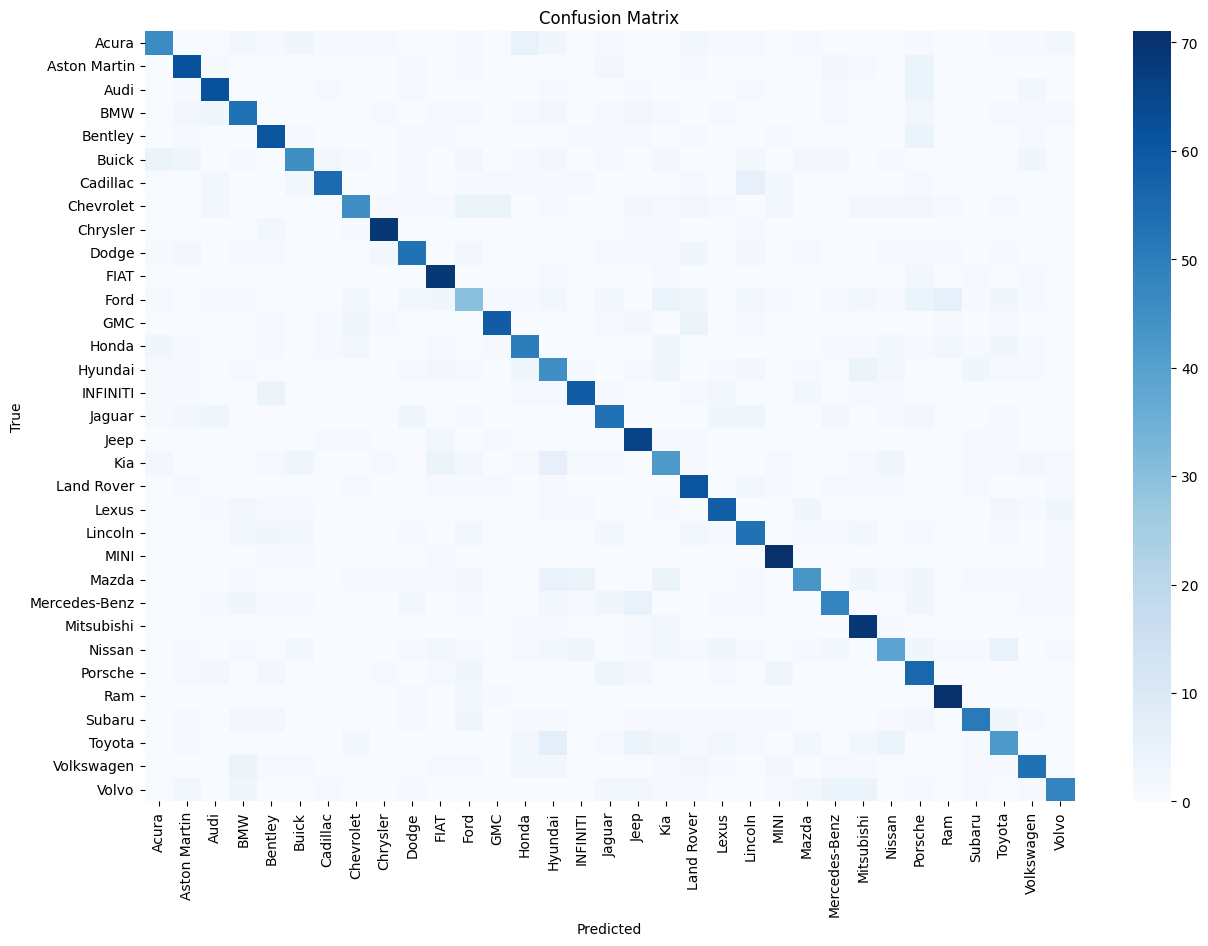


Classification Report:

               precision    recall  f1-score   support

        Acura       0.77      0.61      0.68        75
 Aston Martin       0.75      0.83      0.78        75
         Audi       0.79      0.83      0.81        75
          BMW       0.69      0.71      0.70        75
      Bentley       0.73      0.81      0.77        75
        Buick       0.73      0.60      0.66        75
     Cadillac       0.87      0.73      0.80        75
    Chevrolet       0.75      0.60      0.67        75
     Chrysler       0.88      0.92      0.90        75
        Dodge       0.73      0.71      0.72        75
         FIAT       0.76      0.92      0.83        75
         Ford       0.48      0.40      0.44        75
          GMC       0.86      0.79      0.82        75
        Honda       0.70      0.67      0.68        75
      Hyundai       0.52      0.60      0.56        75
     INFINITI       0.82      0.79      0.80        75
       Jaguar       0.70      0.71     

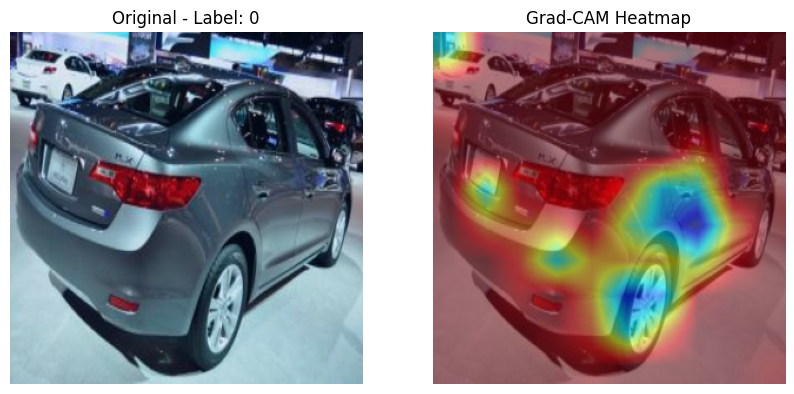

In [6]:
#Confusion Matrix & Grad-CAM

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(model, loader, classes):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(15, 10))
    sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    print("\nClassification Report:\n")
    print(classification_report(all_labels, all_preds, target_names=classes))


# Grad-CAM G√∂rselle≈ütirme
from torch.nn import functional as F

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.model.eval()
        self.gradients = None
        self.activations = None
        # Hook: target layer‚Äôdan hem aktivasyonlarƒ± hem de grad'leri alacaƒüƒ±z
        target_layer.register_forward_hook(self.forward_hook)
        target_layer.register_full_backward_hook(self.backward_hook)

    def forward_hook(self, module, input, output):
        self.activations = output

    def backward_hook(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def generate_cam(self, input_image, target_class=None):
        input_image = input_image.unsqueeze(0).to(device)

        output = self.model(input_image)
        if target_class is None:
            target_class = output.argmax(dim=1).item()

        # Backward pass
        self.model.zero_grad()
        class_score = output[0, target_class]
        class_score.backward()

        # Grad-CAM hesaplama
        gradients = self.gradients.detach().cpu().numpy()[0]
        activations = self.activations.detach().cpu().numpy()[0]
        weights = gradients.mean(axis=(1, 2))
        cam = np.zeros(activations.shape[1:], dtype=np.float32)

        for i, w in enumerate(weights):
            cam += w * activations[i, :, :]

        cam = np.maximum(cam, 0)
        cam = cv2.resize(cam, (300, 300))
        cam = cam - cam.min()
        cam = cam / cam.max()
        return cam

# √ñrnek g√∂rselle≈ütirme
def show_gradcam_example(model, dataset, gradcam):
    img, label = dataset[0]  # ƒ∞lk √∂rneƒüi alalƒ±m
    cam = gradcam.generate_cam(img, target_class=label)

    img_np = img.permute(1, 2, 0).numpy()
    img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min())

    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    superimposed_img = heatmap + img_np
    superimposed_img = superimposed_img / superimposed_img.max()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"Original - Label: {label}")
    plt.imshow(img_np)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Grad-CAM Heatmap")
    plt.imshow(superimposed_img)
    plt.axis("off")
    plt.show()

# Confusion Matrix √ßizdir
plot_confusion_matrix(model, test_loader, train_dataset.classes)

# Grad-CAM √∂rneƒüi
gradcam = GradCAM(model, model.features[-1])  # EfficientNet son convolution bloƒüu
show_gradcam_example(model, test_dataset, gradcam)


# **7. Modelin Deƒüerlendirilmesi: Accuracy & Loss Grafikler**

Bu b√∂l√ºmde, modelin eƒüitim s√ºrecindeki performansƒ± **grafiklerle g√∂rselle≈ütirilir**.  
Hem kayƒ±p (loss) hem de doƒüruluk (accuracy) deƒüerleri izlenerek modelin √∂ƒürenme durumu analiz edilir.

---

## **1. Kayƒ±p ve Doƒüruluk Takibi**
- Eƒüitim ve doƒürulama doƒüruluƒüu ile eƒüitim kaybƒ± her epoch sonunda kaydedilir.
- B√∂ylece modelin:
  - **Overfitting** yapƒ±p yapmadƒ±ƒüƒ±
  - **√ñƒürenme hƒ±zƒ±nƒ±n** uygun olup olmadƒ±ƒüƒ±
  - Eƒüitim s√ºrecinde hangi epochlarda iyile≈üme saƒülandƒ±ƒüƒ±  
  kolayca takip edilebilir.

---

## **2. Eƒüitim Grafikleri**
- **Training Loss:** Eƒüitim sƒ±rasƒ±nda kaybƒ±n nasƒ±l deƒüi≈ütiƒüini g√∂sterir.
- **Train & Validation Accuracy:** Hem eƒüitim hem doƒürulama doƒüruluƒüunu aynƒ± grafikte kar≈üƒ±la≈ütƒ±rƒ±r.
- Bu grafikler sayesinde:
  - Modelin hangi noktada en iyi performansƒ± g√∂sterdiƒüi
  - Early stopping veya hiperparametre ayarlamalarƒ±nƒ±n etkisi
  hƒ±zlƒ±ca g√∂zlemlenebilir.

---

Grafiklerin √ßizimi, eƒüitim tamamlandƒ±ktan sonra yapƒ±lƒ±r ve modelin performans trendlerini g√∂rselle≈ütirir.


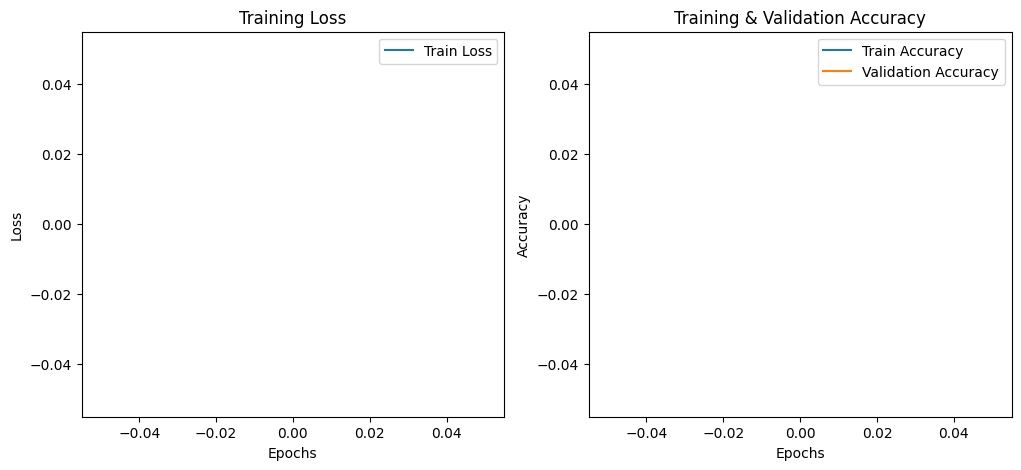

In [7]:
#Accuracy & Loss Grafikleri

train_losses, val_accuracies, train_accuracies = [], [], []

def train(model, train_loader, val_loader, epochs=20, patience=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-3)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    
    scaler = GradScaler()
    best_acc, counter = 0.0, 0

    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]", leave=True)

        for images, labels in loop:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            with autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            loop.set_postfix(loss=running_loss / (total // train_loader.batch_size + 1), acc=correct / total)

        train_acc = correct / total
        val_acc = evaluate(model, val_loader)

        # Kayƒ±t tut
        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"üìä Epoch [{epoch+1}/{epochs}] - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_model.pth")
            print("‚úÖ Model saved!")
            counter = 0
        else:
            counter += 1

        if counter >= patience:
            print(f"‚èπÔ∏è Early stopping after {epoch+1} epochs. Best Val Acc: {best_acc:.4f}")
            break

        scheduler.step()
    print(" Training complete!")


# Eƒüitim Sonucu Grafikleri


def plot_training_curves():
    # Bu fonksiyon, her epoch sonunda kaydedilen eƒüitim kaybƒ± ve eƒüitim/doƒürulama doƒüruluklarƒ±nƒ± g√∂rselle≈ütirir.
    plt.figure(figsize=(12,5))

    # Loss
    plt.subplot(1,2,1)
    plt.plot(train_losses, label="Train Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.legend()

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(val_accuracies, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training & Validation Accuracy")
    plt.legend()

    plt.show()

plot_training_curves()
